# Predicting Heart Disease Using Classification 

## Introduction 

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. One of the best ways to reduce the mortality and severity of heart diseases is early detection of the same in an individual. In this project, we seek to utilise some commonly available medical metrics to predict whether an individual has heart disease or not. 

The dataset required to train our model has been taken from the UCI Machine Learning Repository and is made up of data collected from 4 different places across the world. The database involves variables such as age, sex, cholestoral and blood pressure etc. and a final column which classifies the presence of heart disease on a scale of 0 to 4 where 0 represents absence of heart disease and 1-4 represnets presence of heart disease. 


## Preliminary exploratory data analysis:

In [1]:
# loading all the required libraries. 
library(tidyverse) 
library(dplyr)
library(tidymodels) 
library(gridExtra)
library(repr)
library(GGally)
install.packages("ISLR")
library(ISLR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.4 ──

✔ broom        0.7.9      ✔ rsample      0.1.0 
✔ dials        0.0.10     ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.8 
✔ recipes      0.1.17     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks

In [2]:
#loading the required datasets and merging them
heart_data1 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names=FALSE)
heart_data2 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names=FALSE)
heart_data3 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=FALSE)
heart_data4 <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names=FALSE)
#merging the data from the various cities 
heart_data <- rbind (heart_data1, heart_data2, heart_data3, heart_data4)
#adding column names to the data 
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang",  "oldpeak", "slope",  "ca",  "thal", "num")
#viewing the data
head(heart_data)

Rows: 294 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 123 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 303 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column t

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0


In [3]:
#tidying the data further by modifying num column to show weather the patient has heart disease or not
num <- heart_data %>%
    select (num) %>%
    mutate (num = as.character (num))
num [num == "1"] <- "Y"
num [num == "2"] <- "Y"
num [num == "3"] <- "Y"
num [num == "4"] <- "Y"
num [num == "0"] <- "N"
num <- num %>%
 mutate (num = as_factor (num))
#selecting the required columns 
heart_data_selected <- heart_data%>%
    select (age, trestbps, thalach, chol)
#merging the data again 
heart_data_merged <- cbind(heart_data_selected, num) %>%
    rename ("heart_disease" = "num")
#changing the data types of some columns 
heart_data_final <- heart_data_merged %>%
     mutate (trestbps = as.numeric (trestbps),
            chol = as.numeric (chol),
            thalach = as.numeric (thalach))
head(heart_data_final)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,age,trestbps,thalach,chol,heart_disease
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,28,130,185,132,N
2,29,120,160,243,N
3,29,140,170,NA,N
4,30,170,170,237,N
5,31,100,150,219,N
6,32,105,165,198,N


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 59 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 55 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 30 rows containing missing values”
Warning message:
“Removed 59 rows containing missing values (geom_point).”
Warning message:
“Removed 59 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 59 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 86 rows containing missing values”
Warning message:
“Removed 59 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 55 rows containing missing values (geom_point).”
Warning message:
“Removed 59 rows containing 

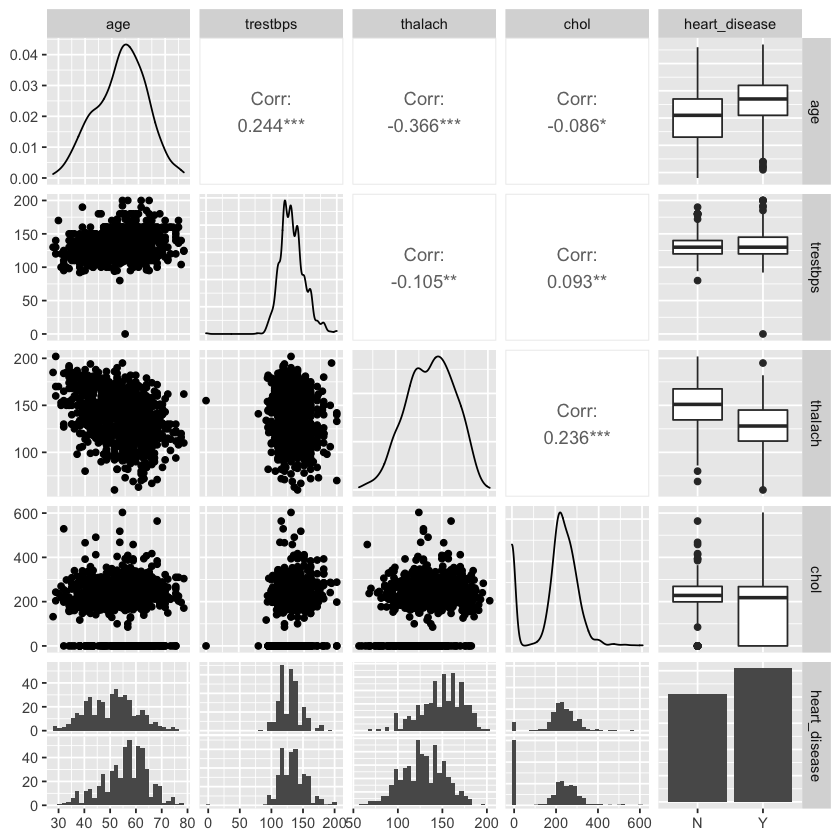

In [4]:
heart_pair <- heart_data_final %>% 
ggpairs()
heart_pair

In [5]:
#spliting the data into training and testing 
set.seed(1)
heart_data_split <- initial_split(heart_data_final, prop=.75, strata = heart_disease)
heart_data_training <- training(heart_data_split) 
heart_data_testing <- testing(heart_data_split)

In [6]:
#summarizing the data 
#calculating the mean 
predictors_mean <- heart_data_training %>%
    summarize(across(age:exang, mean, na.rm = TRUE))
#counting the missing data 
na_count <- map_df(heart_data_final, ~sum(is.na(.)))
#Proportion of heart disease 
heart_disease_proportion <- heart_data_training %>%
    group_by (heart_disease) %>%
    summarize (observation_number = n()) %>%
    mutate (percent = 100*observation_number/nrow(heart_data_training))
heart_disease_proportion
na_count
predictors_mean   

ERROR: Error: Problem with `summarise()` input `..1`.
[34mℹ[39m `..1 = across(age:exang, mean, na.rm = TRUE)`.
[31m✖[39m Can't subset columns that don't exist.
[31m✖[39m Column `exang` doesn't exist.


Warning message:
“Ignoring unknown parameters: text”


$x
[1] "Age (in years)"

$fill
[1] "Presence of Heart Disease"

attr(,"class")
[1] "labels"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 42 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 19 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 38 rows containing non-finite values (stat_bin).”


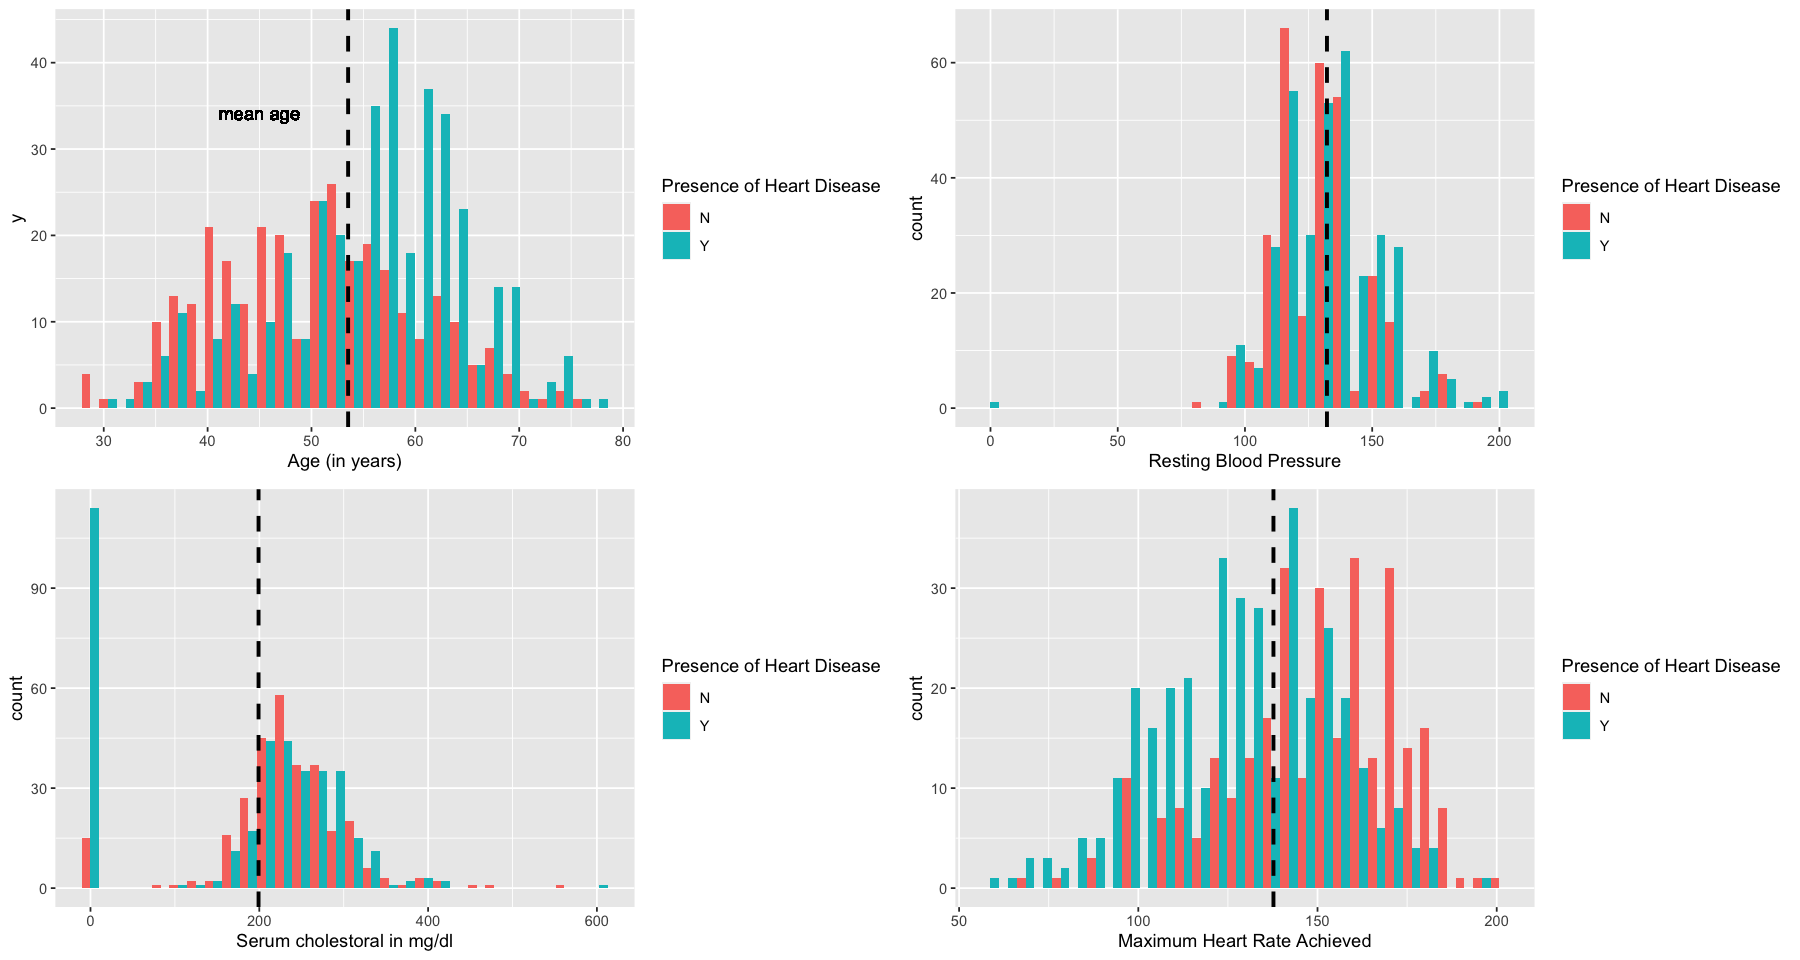

In [7]:
#visualising the data 
age_plot <- heart_data_training %>% 
ggplot(aes(x = age, fill = as_factor(heart_disease))) + 
geom_histogram(position = "dodge") + 
geom_vline(xintercept = 53.5283, linetype="dashed", size = 1.1)+
labs(x="Age (in years)", fill = "Presence of Heart Disease")+
geom_text(aes(x = 45, label = "mean age", y = 35), colour="black", angle=0, vjust = 1, text=element_text(size=40))
labs(x="Age (in years)", fill = "Presence of Heart Disease")

trest_bps_plot <- heart_data_training %>% 
ggplot(aes(x = trestbps, fill = as_factor(heart_disease))) + 
geom_histogram(position = "dodge") +
labs(x="Resting Blood Pressure", fill = "Presence of Heart Disease")+ 
geom_vline(xintercept = 132.221, linetype="dashed", size = 1.1)

chol_plot <- heart_data_training %>% 
ggplot(aes(x = chol, fill = as_factor(heart_disease))) + 
geom_histogram(position = "dodge") + 
labs(x="Serum cholestoral in mg/dl", fill = "Presence of Heart Disease")+ 
geom_vline(xintercept = 199.1209, linetype="dashed", size = 1.1)

thalach_plot <- heart_data_training %>% 
ggplot(aes(x = thalach, fill = as_factor(heart_disease))) + 
geom_histogram(position = "dodge") +
labs(x = "Maximum Heart Rate Achieved", fill = "Presence of Heart Disease")+ 
geom_vline(xintercept = 137.7066, linetype="dashed", size = 1.1)

#changing the plot size 
options(repr.plot.height = 8, repr.plot.width=15)
#presenting the data in a grid 
grid.arrange(age_plot, trest_bps_plot, chol_plot, thalach_plot, nrow=2)

## Methods 
The variables we plan on using in our model are: 
1. Age - [People age 65 and older are much more likely than younger people to suffer a heart attack, to have a stroke, or to develop heart disease and heart failure. ](https://www.nia.nih.gov/health/heart-health-and-aging). This can be due to the heart not being able to beat fast enough during physical activity or times of stress as it did earlier or due to the buildup of fatty deposits in the walls of arteries over the years.
2. [Increased amounts of cholestorol can build up in the wall of your arteries leading to the thining of the arteries and ultimately leading to less blood flow to the heart muscle. This can lead to various heart disease and even heart attacks, in some cases](https://www.webmd.com/heart-disease/guide/heart-disease-lower-cholesterol-risk)
3. [Heart rate (HR) is a predictor of cardiovascular, cerebrovascular and all-cause mortality in the general population](https://pubmed.ncbi.nlm.nih.gov/29355923/). Elevated heart rate is associated with high blood pressure which can damage your arteries and reduce its elasticty. This reduces the blood flow to the heart, often resulting in heart disease. 

## Expected Outcomes and Significance 